<a href="https://colab.research.google.com/github/bodabhavani/My_Project/blob/master/DPDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import printable
from keras.preprocessing import sequence
from sklearn import model_selection
from keras import regularizers
from keras.layers import Input, LSTM, Embedding, Conv1D, MaxPooling1D, ELU, BatchNormalization
from keras.layers.core import Dropout,Dense, Lambda
from keras.models import Model
from keras import backend as tf

In [4]:
data = pd.read_csv("/content/drive/My Drive/url_data.csv")

In [5]:
data.head(5)

,url,isMalicious
0,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
1,gosugamers.net/lol/streams,0
2,thingiverse.com/corkyzett/collections/intlwome...,0
3,bausch.com/our-products/contact-lens-care/spec...,0
4,w88mobile.org/game/5151.html,0


In [7]:
integer_enc = [[printable.index(x) + 1 for x in url if x in printable] for url in data.url]



In [8]:
type(integer_enc)

list

In [9]:
integer_enc[0]

[19,
 23,
 11,
 17,
 19,
 24,
 17,
 75,
 28,
 15,
 29,
 25,
 31,
 28,
 13,
 15,
 76,
 13,
 25,
 23,
 77,
 52,
 54,
 51,
 40,
 55,
 77,
 25,
 22,
 35,
 23,
 26,
 31,
 29,
 75,
 15,
 75,
 23,
 2,
 75,
 19,
 19,
 77,
 25,
 22,
 35,
 23,
 26,
 31,
 29,
 75,
 15,
 75,
 23,
 2,
 75,
 19,
 19,
 37,
 76,
 44,
 56,
 49]

In [10]:
len_of_url=200

In [11]:
X = sequence.pad_sequences(integer_enc, maxlen=len_of_url)

In [12]:
type(X)
X.shape


(194797, 200)

In [13]:
X[0:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 23, 11, 17, 19, 24, 17,
        75, 28, 15, 29, 25, 31, 28, 13, 15, 76, 13, 25, 23, 77, 52, 54,
        51, 40, 55, 77, 25, 22, 35, 23, 26, 31, 29, 75, 15, 75, 23,  2,
        75, 19, 19, 77, 25, 22, 35, 23, 26, 31, 29, 75, 15, 75, 23,  2,
        75, 19, 19, 37, 76, 44, 56, 49],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

In [17]:

labels = np.array(data.isMalicious)


In [18]:
type(labels)

numpy.ndarray

In [19]:
print('Shape of input: ', X.shape, ' Shape of Label: ', labels.shape)

Shape of input:  (194797, 200)  Shape of Label:  (194797,)


In [20]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, labels, test_size=0.25)

In [21]:
  X_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35,
       26, 23, 76, 23, 15, 77, 11, 14, 23, 19, 24,  3, 77, 16, 31, 24, 13,
       30, 19, 25, 24, 29, 77, 11, 26, 19, 77, 11, 26, 19], dtype=int32)

In [25]:
def lstm_model():
    input_layer = Input(shape=(len_of_url,), dtype='int32', name='main_input')
    embed = Embedding(input_dim=100, output_dim=512, input_length=len_of_url)(input_layer) 
    lstm = LSTM(32)(embed)
    lstm = Dropout(0.5)(lstm)
    output_layer = Dense(1, activation='sigmoid', name='output')(lstm)
    model_lstm = Model(input=[input_layer], output=[output_layer])
    model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_lstm

In [27]:
model1 = lstm_model()
history = model1.fit(X_train,Y_train,validation_split=0.33,epochs = 10,batch_size = 1000)
loss, acc1 = model1.evaluate(X_test,Y_test,verbose = 1)
print(history.history.keys())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  import sys
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 97884 samples, validate on 48213 samples
Epoch 1/10
97884/97884 [==============================] - 38s 383us/step - loss: 0.4911 - accuracy: 0.7709 - val_loss: 0.3839 - val_accuracy: 0.8314
Epoch 2/10
97884/97884 [==============================] - 37s 376us/step - loss: 0.3643 - accuracy: 0.8466 - val_loss: 0.3248 - val_accuracy: 0.8608
Epoch 3/10
97884/97884 [==============================] - 37s 382us/step - loss: 0.3177 - accuracy: 0.8694 - val_loss: 0.2899 - val_accuracy: 0.8788
Epoch 4/10
97884/97884 [==============================] - 37s 377us/step - loss: 0.2957 - accuracy: 0.8802 - val_loss: 0.2693 - val_accuracy: 0.8875
Epoch 5/10
97884/97884 [==============================] - 36s 372us/step - loss: 0.2750 - accuracy: 0.8892 - val_loss: 0.2619 - val_accuracy: 0.8930
Epoch 6/10
97884/97884 [==============================] - 37s 373us/step - loss: 0.2633 - accuracy: 0.8941 - val_loss: 0.2451 - val_accuracy: 0.8990
Epoch 7/10
97884/97884 [==============================] 

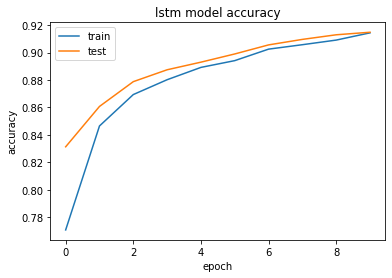

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('lstm model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


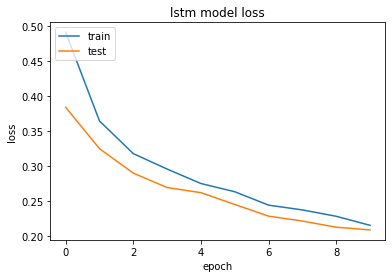

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model1.summary()
print('\nFinal Accuracy', acc1, '\n')


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 512)          51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                69760     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 120,993
Trainable params: 120,993
Non-trainable params: 0
_________________________________________________________________

Final Accuracy 0.913408637046814 



In [32]:
def conv_lstm():
  input_layer = Input(shape = (len_of_url,),dtype = 'int32', name = 'input')
  embed_layer = Embedding(input_dim = 100,output_dim = 512, input_length = 200)(input_layer)
  embed_layer = Dropout(0.25)(embed_layer)
  conv_layer = Conv1D(kernel_size = 5,filters = 256,border_mode = 'same')(embed_layer)
  conv_layer = ELU()(conv_layer)
  conv_layer = MaxPooling1D(pool_size = 4)(conv_layer)
  conv_layer = Dropout(0.5)(conv_layer)
  lstm_layer = LSTM(64, activation = "tanh")(conv_layer)
  lstm_layer = Dropout(0.5)(lstm_layer)
  output_layer = Dense(1,activation = 'sigmoid',name= 'output')(lstm_layer)
  model2 =Model(input = [input_layer],output = [output_layer])
  model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model2

In [33]:

model2 = conv_lstm()
history = model2.fit(X_train, Y_train,validation_split=0.33,epochs = 20,batch_size = 1000)
loss, acc2 = model2.evaluate(X_test,Y_test,verbose = 1)
print('Accuracy of hybrid model', acc2, '\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=5, filters=256, padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 97884 samples, validate on 48213 samples
Epoch 1/20
97884/97884 [==============================] - 40s 412us/step - loss: 0.3900 - accuracy: 0.8221 - val_loss: 0.2545 - val_accuracy: 0.8963
Epoch 2/20
97884/97884 [==============================] - 31s 316us/step - loss: 0.2372 - accuracy: 0.9053 - val_loss: 0.1932 - val_accuracy: 0.9209
Epoch 3/20
97884/97884 [==============================] - 31s 320us/step - loss: 0.1972 - accuracy: 0.9228 - val_loss: 0.1637 - val_accuracy: 0.9360
Epoch 4/20
97884/97884 [==============================] - 31s 320us/step - loss: 0.1778 - accuracy: 0.9308 - val_loss: 0.1512 - val_accuracy: 0.9416
Epoch 5/20
97884/97884 [==============================] - 31s 318us/step - loss: 0.1664 - accuracy: 0.9355 - val_loss: 0.1465 - val_accuracy: 0.9437
Epoch 6/20
97884/97884 [==============================] - 31s 321us/step - loss: 0.1525 - accuracy: 0.9400 - val_loss: 0.1451 - val_accuracy: 0.9446
Epoch 7/20
97884/97884 [==============================] 

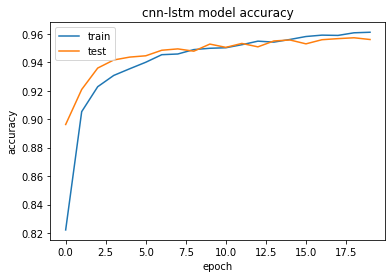

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn-lstm model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

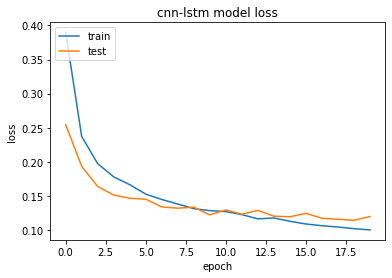

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn-lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
model2.summary()
print('\nFinal Accuracy', acc2, '\n')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 512)          51200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 256)          655616    
_________________________________________________________________
elu_1 (ELU)                  (None, 200, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 256)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 256)           0   

In [43]:
def conv_model():
    input_layer = Input(shape=(len_of_url,), dtype='int32', name='input')
    embed = Embedding(input_dim=100, output_dim=512, input_length=len_of_url)(input_layer) 
    embed = Dropout(0.25)(embed)
    def comp(X):
        return tf.sum(X, axis=1)
    conv = Conv1D(kernel_size = 4, filters = 256)(embed)
    conv = Lambda(comp, output_shape=(256,))(conv)
    conv = Dropout(0.5)(conv)
    
    hidden = Dense(1024)(conv)
    hidden = ELU()(hidden)
    hidden = Dropout(0.5)(hidden)
    output_layer = Dense(1, activation='sigmoid', name='output')(hidden)
    
    model_conv = Model(input=[input_layer], output=[output_layer])
    model_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_conv

    
    
    
    

    


In [44]:

model3 = conv_model()
history = model3.fit(X_train, Y_train,validation_split=0.33, epochs=10, batch_size=1000)
loss, acc3 = model3.evaluate(X_test, Y_test, verbose=1)
print(history.history.keys())

model3.summary()
print('\nAccuracy of conv model', acc3, '\n')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 97884 samples, validate on 48213 samples
Epoch 1/10
97884/97884 [==============================] - 25s 254us/step - loss: 1.4664 - accuracy: 0.6026 - val_loss: 0.5105 - val_accuracy: 0.7379
Epoch 2/10
97884/97884 [==============================] - 21s 219us/step - loss: 0.5857 - accuracy: 0.6966 - val_loss: 0.4822 - val_accuracy: 0.7635
Epoch 3/10
97884/97884 [==============================] - 21s 215us/step - loss: 0.5377 - accuracy: 0.7288 - val_loss: 0.4660 - val_accuracy: 0.7724
Epoch 4/10
97884/97884 [==============================] - 21s 219us/step - loss: 0.5062 - accuracy: 0.7485 - val_loss: 0.4441 - val_accuracy: 0.7862
Epoch 5/10
97884/97884 [==============================] - 22s 221us/step - loss: 0.4760 - accuracy: 0.7704 - val_loss: 0.4362 - val_accuracy: 0.7907
Epoch 6/10
97884/97884 [==============================] - 21s 219us/step - loss: 0.4594 - accuracy: 0.7816 - val_loss: 0.4267 - val_accuracy: 0.7968
Epoch 7/10
97884/97884 [==============================] 

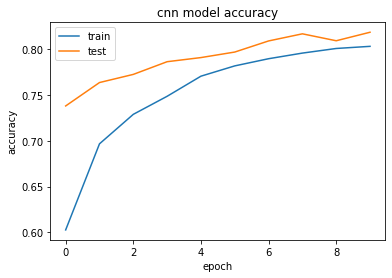

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

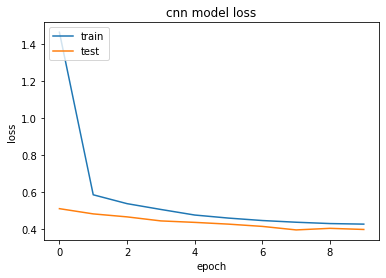

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

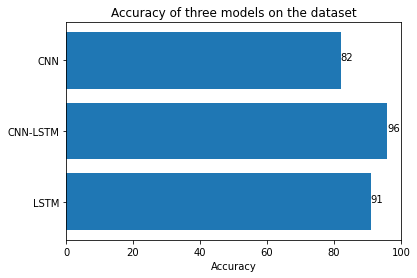

In [47]:
names = ["LSTM","CNN-LSTM","CNN"]
results = [round(acc1*100),round(acc2*100),round(acc3*100)]
plt.title("Accuracy of three models on the dataset")
plt.xlabel("Accuracy")
plt.xlim(0,100)
plt.barh(names,results)
for index, value in enumerate(results):

    plt.text(value, index, str(value))






In [53]:

input_url = "	https://kingsbagbd.net/wp-content/uploads/2015/04/MARKET/MARKET/"
integerencoding = [[printable.index(i) + 1 for i in input_url if i in printable]]
max_len=200
X = sequence.pad_sequences(integerencoding, maxlen=len_of_url)
prob = model2.predict(X, batch_size=1)
def result(x):
    if x > 0.5:
        return "malicious"
    else:
        return "benign"
print("Test URL:", url, "is", print_result(prob[0]))



Test URL: 	https://kingsbagbd.net/wp-content/uploads/2015/04/MARKET/MARKET/ is malicious
